In [3]:
import warnings
warnings.filterwarnings('ignore')

import iris
import numpy
import matplotlib.pyplot as plt

In [4]:
vol_file = '/g/data/r87/dbi599/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Omon/volo/gn/v20190710/volo-tsdist_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_1986-2005-monthly-clim.nc'

In [5]:
vol_cube = iris.load_cube(vol_file)
print(vol_cube.summary(shorten=True))

ocean_volume / (m3)                 (sea_water_salinity: 109; sea_water_potential_temperature: 127; region: 7)


In [17]:
def plot_basin(vol_cube, basin_name):
    """Plot at volume distribution."""
    
    x_values = vol_cube.coord('sea_water_salinity').points
    y_values = vol_cube.coord('sea_water_potential_temperature').points
    extents = [x_values[0], x_values[-1], y_values[0], y_values[-1]]
    
    basin_dict = {'north_atlantic': 0, 'south_atlantic': 1,
                  'north_pacific': 2, 'south_pacific': 3,
                  'indian': 4, 'arctic': 5, 'marginal_seas_and_land': 6} 

    log_hist = numpy.log(vol_cube.data[:, :, basin_dict[basin_name]]).T
    
    plt.figure(figsize=(9, 8))
    plt.imshow(log_hist, origin='lower', extent=extents, aspect='auto', cmap='hot_r')
    cb = plt.colorbar()
    cb.set_label('log(volume), $m^3 (^\circ C \; g/kg)^{-1}$')
    plt.title(basin_name)
    plt.xlabel('salinity (g/kg)')
    plt.ylabel('temperature (C)')
    plt.show()

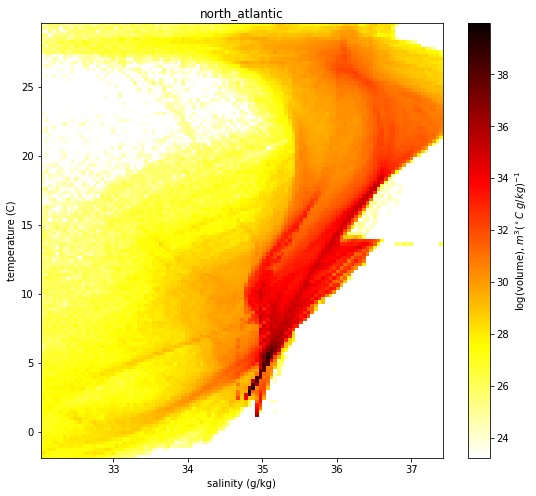

In [18]:
plot_basin(vol_cube, 'north_atlantic')

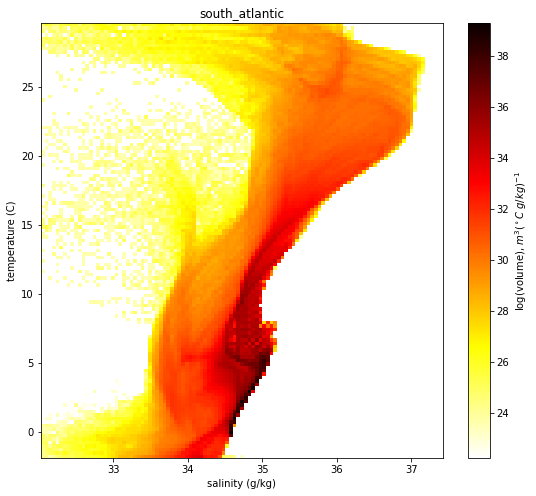

In [19]:
plot_basin(vol_cube, 'south_atlantic')

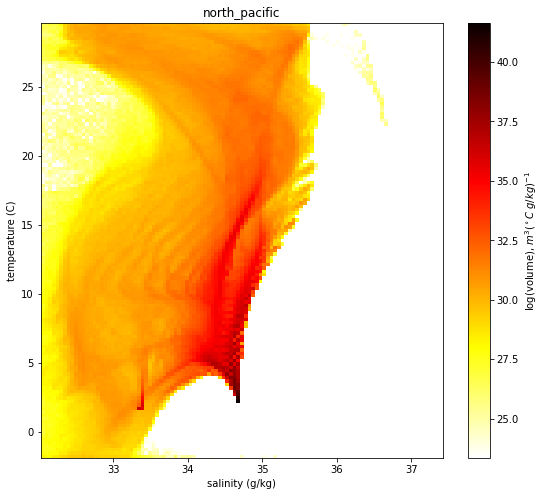

In [20]:
plot_basin(vol_cube, 'north_pacific')

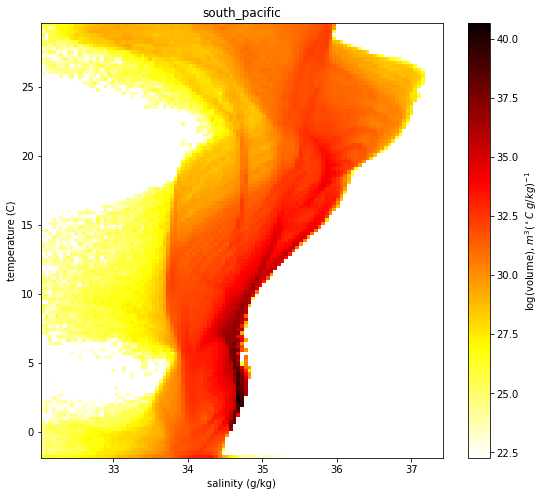

In [21]:
plot_basin(vol_cube, 'south_pacific')

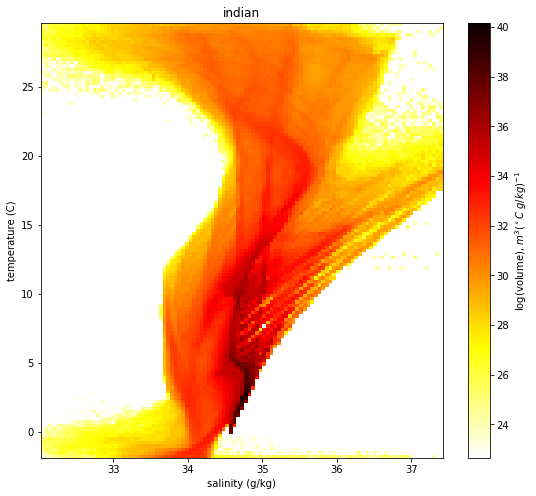

In [22]:
plot_basin(vol_cube, 'indian')

In [9]:
wm_file = '/g/data/r87/dbi599/temp/water-mass_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-185412.nc'

In [10]:
wm_cube = iris.load(wm_file)

In [11]:
wm_cube

[<iris 'Cube' of Sea Water Potential Temperature times Ocean Grid-Cell Volume / (degC m3) (year: 5; sea_water_potential_temperature: 127; region: 7)>,
<iris 'Cube' of Sea Water Salinity times Ocean Grid-Cell Volume / (g/kg m3) (year: 5; sea_water_potential_temperature: 127; region: 7)>,
<iris 'Cube' of ocean_volume / (m3) (year: 5; sea_water_potential_temperature: 127; region: 7)>]

In [12]:
so_profiles = wm_cube[1] / wm_cube[2] 

In [14]:
so_profiles.summary(shorten=True)

'unknown / (0.001 1)                 (year: 5; sea_water_potential_temperature: 127; region: 7)'

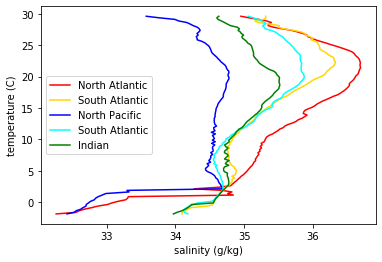

In [18]:
plt.plot(so_profiles.data[0, :, 0], so_profiles.coord('sea_water_potential_temperature').points,
         color='red', label='North Atlantic')
plt.plot(so_profiles.data[0, :, 1], so_profiles.coord('sea_water_potential_temperature').points,
         color='gold', label='South Atlantic')
plt.plot(so_profiles.data[0, :, 2], so_profiles.coord('sea_water_potential_temperature').points,
         color='blue', label='North Pacific')
plt.plot(so_profiles.data[0, :, 3], so_profiles.coord('sea_water_potential_temperature').points,
         color='cyan', label='South Atlantic')
plt.plot(so_profiles.data[0, :, 4], so_profiles.coord('sea_water_potential_temperature').points,
         color='green', label='Indian')
plt.xlabel('salinity (g/kg)')
plt.ylabel('temperature (C)')
plt.legend()
plt.show()

In [ ]:
so_profiles.coord('sea_water_potential_temperature')